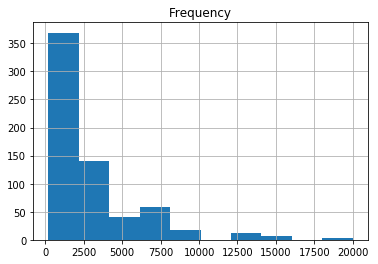

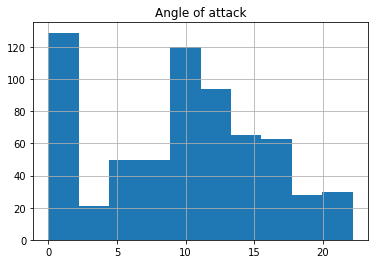

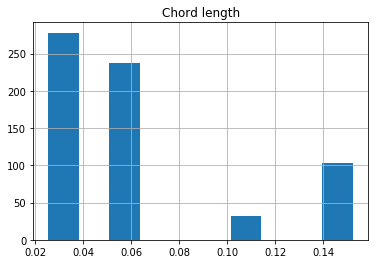

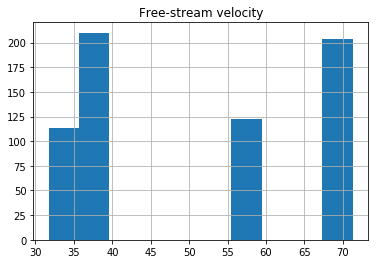

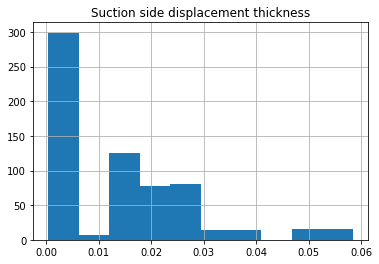

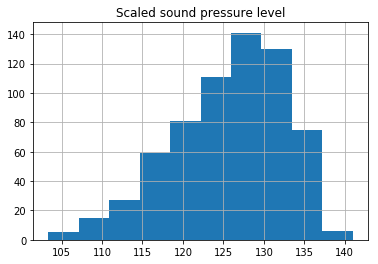

In [3]:
import pandas as pd

train_data = pd.read_csv("airfoil_self_noise_train.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])
test_data = pd.read_csv("airfoil_self_noise_test.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])

hist_frequency = train_data.hist(column='Frequency')
hist_angle_attack = train_data.hist(column='Angle of attack') 
hist_chord_length = train_data.hist(column='Chord length')
hist_free_stream_velocity= train_data.hist(column='Free-stream velocity')
hist__suction_displacement_thickness = train_data.hist(column='Suction side displacement thickness')
hist_sound_pressure = train_data.hist(column='Scaled sound pressure level')

In [87]:
import pandas as pd
import numpy as np 

train_data = pd.read_csv("airfoil_self_noise_train.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])
test_data  = pd.read_csv("airfoil_self_noise_test.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])

#append a column of ones and grab only five features, leave y out

list_of_ones = {'Ones' : [1] * 650}
#print(list_of_ones)
#now
X = pd.DataFrame(list_of_ones)
X.insert(1,'Frequency', train_data['Frequency'])
X.insert(2,'Angle of attack', train_data['Angle of attack'])
X.insert(3,'Chord length', train_data['Chord length'])
X.insert(4,'Free-stream velocity', train_data['Free-stream velocity'])
X.insert(5,'Suction side displacement thickness', train_data['Suction side displacement thickness'])
#print(X)

#for (ii), w* = (X^T X)^-1 (X^T y)
first_part = X.T #X^T
sec_part = np.dot(first_part, X) #(X^T . X)
#print(sec_part.shape)
third_part = np.linalg.inv(sec_part) #(X^T . X)^-1
#print(third_part.shape)
fourth_part = np.dot(third_part, first_part)#(X^T . X)^-1 . X^T
#print(fourth_part.shape)
y = train_data['Scaled sound pressure level']
weight_star = np.dot(fourth_part, y)#((X^T . X)^-1 . X^T) . y
print("The w* is:")
print(weight_star)
#print(fifth_part.shape)

#for (iii), for Rss(w) = (y-Xw)^T (y-Xw) with test data
list_of_ones_test = {'Ones' : [1] * 150}
X_t = pd.DataFrame(list_of_ones_test)
X_t.insert(1,'Frequency', test_data['Frequency'])
X_t.insert(2,'Angle of attack', test_data['Angle of attack'])
X_t.insert(3,'Chord length', test_data['Chord length'])
X_t.insert(4,'Free-stream velocity', test_data['Free-stream velocity'])
X_t.insert(5,'Suction side displacement thickness', test_data['Suction side displacement thickness'])
#print(X)

y_t = test_data['Scaled sound pressure level']
first_part_2 = np.dot(X_t,weight_star) #X.w
#print(first_part_2.shape)
sec_part_2 = np.subtract(y_t, first_part_2)# y-Xw
#print(sec_part_2.shape)
third_part_2 = sec_part_2.T
#print(third_part_2.shape)
fourth_part_2 = np.dot(third_part_2, sec_part_2)#(y-Xw)^T (y-Xw)
#print(fourth_part_2.shape)

print("The RSS(w) is :")
print(fourth_part_2)

The w* is:
[ 1.32303685e+02 -7.11322380e-04 -4.54774159e-01 -5.23017057e+01
  8.39826774e-02 -9.14287813e+01]
The RSS(w) is :
5136.396371510546


In [2]:
#bonus

import pandas as pd
import numpy as np 

train_data = pd.read_csv("airfoil_self_noise_train.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])
test_data = pd.read_csv("airfoil_self_noise_test.csv", header=None, names = ['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled sound pressure level'])

list_of_ones = {'Ones' : [1] * 650}
#print(list_of_ones)
list_of_ones_test = {'Ones' : [1] * 150}

#==============================================================================
X_a = pd.DataFrame(list_of_ones)
X_a.insert(1,'Frequency', train_data['Frequency'])
X_a.insert(2,'Angle of attack', train_data['Angle of attack'])
X_a.insert(3,'Chord length', train_data['Chord length'])
#print(X)
X_t_a = pd.DataFrame(list_of_ones_test)
X_t_a.insert(1,'Frequency', test_data['Frequency'])
X_t_a.insert(2,'Angle of attack', test_data['Angle of attack'])
X_t_a.insert(3,'Chord length', test_data['Chord length'])
#print(X)


#for (ii), w* = (X^T X)^-1 (X^T y)
print("For testing the combination of features 'Frequency', 'Angle of attack', and 'Chord length' => ")
first_part_a = X_a.T #X^T
sec_part_a = np.dot(first_part_a, X_a) #(X^T . X)
#print(sec_part.shape)
third_part_a = np.linalg.inv(sec_part_a) #(X^T . X)^-1
#print(third_part.shape)
fourth_part_a = np.dot(third_part_a, first_part_a)#(X^T . X)^-1 . X^T
#print(fourth_part.shape)
y_a = train_data['Scaled sound pressure level']
weight_star_a = np.dot(fourth_part_a, y_a)#((X^T . X)^-1 . X^T) . y
print("The w* is:")
print(weight_star_a)
#print(fifth_part.shape)

y_t_a = test_data['Scaled sound pressure level']
first_part_2_a = np.dot(X_t_a,weight_star_a) #X.w
#print(first_part_2.shape)
sec_part_2_a = np.subtract(y_t_a, first_part_2_a)# y-Xw
#print(sec_part_2.shape)
third_part_2_a = sec_part_2_a.T
#print(third_part_2.shape)
fourth_part_2_a = np.dot(third_part_2_a, sec_part_2_a)#(y-Xw)^T (y-Xw)
#print(fourth_part_2.shape)

print("The RSS(w) is :")
print(fourth_part_2_a)

#==============================================================================
X_b = pd.DataFrame(list_of_ones)
X_b.insert(1,'Free-stream velocity', train_data['Free-stream velocity'])
X_b.insert(2,'Suction side displacement thickness', train_data['Suction side displacement thickness'])
#print(X)
X_t_b  = pd.DataFrame(list_of_ones_test)
X_t_b.insert(1,'Free-stream velocity', test_data['Free-stream velocity'])
X_t_b.insert(2,'Suction side displacement thickness', test_data['Suction side displacement thickness'])
#print(X)


#for (ii), w* = (X^T X)^-1 (X^T y)
first_part_b = X_b.T #X^T
sec_part_b = np.dot(first_part_b, X_b) #(X^T . X)
#print(sec_part.shape)
third_part_b = np.linalg.inv(sec_part_b) #(X^T . X)^-1
#print(third_part.shape)
fourth_part_b = np.dot(third_part_b, first_part_b)#(X^T . X)^-1 . X^T
#print(fourth_part.shape)
y_b = train_data['Scaled sound pressure level']
weight_star_b = np.dot(fourth_part_b, y_b)#((X^T . X)^-1 . X^T) . y
print("\nFor testing the combination of features 'Free-stream velocity' and 'Suction side displacement thickness' =>")
print("The w* is:")
print(weight_star_b)
#print(fifth_part.shape)

y_t_b = test_data['Scaled sound pressure level']
first_part_2_b = np.dot(X_t_b,weight_star_b) #X.w
#print(first_part_2.shape)
sec_part_2_b = np.subtract(y_t_b, first_part_2_b)# y-Xw
#print(sec_part_2.shape)
third_part_2_b = sec_part_2_b.T
#print(third_part_2.shape)
fourth_part_2_b = np.dot(third_part_2_b, sec_part_2_b)#(y-Xw)^T (y-Xw)
#print(fourth_part_2.shape)

print("The RSS(w) is :")
print(fourth_part_2_b)



For testing the combination of features 'Frequency', 'Angle of attack', and 'Chord length' => 
The w* is:
[ 1.37199086e+02 -6.71080419e-04 -5.78857606e-01 -6.58895434e+01]
The RSS(w) is :
11197.760579170084

For testing the combination of features 'Free-stream velocity' and 'Suction side displacement thickness' =>
The w* is:
[ 1.26457667e+02  5.84980864e-02 -2.66241091e+02]
The RSS(w) is :
12948.881702331124
